# Testing packages

In [0]:
#%pip install '/dbfs/mnt/users/Shared EU/Python/whl_files/mofr/mofr-1.0-py3-none-any.whl'

In [1]:
import pandas as pd
import numpy as np
import random

C:\Users\hp\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Metrics

## Simple scores

In [2]:
from mofr import metrics

In [5]:
df=pd.read_csv('Model_Eval_Data_For_Andrej.csv')

In [6]:
df['p_churn']=df['p_alive']*-1+1
df['target_obs']=1
df['random_score']=np.random.randint(1, 1000000, df.shape[0])/1000000
df['semi_random_score']=0.7*df['p_churn']+0.3*np.random.normal(0,1,df.shape[0])
df['month']=df['target_obs'].apply(lambda x: random.choice([202001,202002,202003]))

In [7]:
len(df)

7946

In [8]:
df.head()

,TECCOMPCE,TECSOLDTO,p_alive,CLV,p_alive_,PB_Churn_Flag,CLV_,ob,omx,omn,...,CreditBlock,Churn,a,b,target,target_obs,p_churn,random_score,semi_random_score,month
0,40,636362,0.994196,2821.981425,0,994196067.0,0,2821,981425.0,11,...,2020-09-29 00:00:00.0000000,2019-10-01 00:00:00.0000000,NaN,0.0,0,1,0.005804,0.945954,0.516381,202001
1,40,441577,0.613307,0.000000,0,613306736.0,0,0,1.0,2018-10-01 00:00:00.0000000,...,NaN,NaN,1.0,NaN,1,1,0.386693,0.231514,-0.011564,202002
2,40,422141,0.462324,3340.062341,0,462324357.0,1,3340,62341.0,7,...,2020-07-01 00:00:00.0000000,2020-02-19 00:00:00.0000000,NaN,0.0,0,1,0.537676,0.338867,-0.276178,202001
3,40,706342,0.841013,5023.797898,0,841012858.0,0,5023,797898.0,17,...,2020-07-17 00:00:00.0000000,2019-10-03 00:00:00.0000000,NaN,0.0,0,1,0.158987,0.533492,-0.444811,202002
4,40,718698,0.668060,0.000000,0,668060235.0,0,0,1.0,2019-02-06 00:00:00.0000000,...,2020-01-10 00:00:00.0000000,NaN,0.0,NaN,0,1,0.331940,0.502157,0.107446,202002


### Accuracy

In [9]:
metrics.accuracy_score(df['target'], df['p_churn']>0.5)

0.7793858545179965

In [10]:
[metrics.accuracy_score(df['target'], df['p_churn']>(x+1)/1000) for x in range(20)]

[0.31059652655424114,
 0.40057890762647874,
 0.46967027435187514,
 0.5117040020135918,
 0.5485779008306066,
 0.5690913667253964,
 0.591492574880443,
 0.6063428139944627,
 0.618801912912157,
 0.6303800654417316,
 0.6401963251950668,
 0.6477472942360937,
 0.6552982632771206,
 0.6614648879939592,
 0.6676315127107979,
 0.6720362446513969,
 0.676566826076013,
 0.6827334507928517,
 0.6867606342813994,
 0.6906619682859301]

In [11]:
#metrics.accuracy_score?

### Precision

In [12]:
metrics.precision_score(df['target'], df['p_churn']>0.5)

0.5398230088495575

In [13]:
[metrics.precision_score(df['target'], df['p_churn']>(99-x)/100) for x in range(20)]

[0.6588235294117647,
 0.6239316239316239,
 0.625,
 0.618421052631579,
 0.6073619631901841,
 0.6123595505617978,
 0.6096256684491979,
 0.6062176165803109,
 0.6019417475728155,
 0.591304347826087,
 0.5887096774193549,
 0.5889328063241107,
 0.5923076923076923,
 0.6,
 0.5949820788530465,
 0.5929824561403508,
 0.5932203389830508,
 0.5907590759075908,
 0.6006191950464397,
 0.600609756097561]

In [14]:
#metrics.precision_score?

### Recall

In [15]:
metrics.recall_score(df['target'], df['p_churn']>0.5)

0.20254565578306585

In [16]:
[metrics.recall_score(df['target'], df['p_churn']>(99-x)/100) for x in range(20)]

[0.03099059214167128,
 0.040398450470392915,
 0.04703929164360819,
 0.05201992252351965,
 0.05478693967902601,
 0.06032097399003874,
 0.0630879911455451,
 0.06474820143884892,
 0.06862202545655784,
 0.0752628666297731,
 0.08079690094078583,
 0.08245711123408965,
 0.08522412838959602,
 0.0896513558384062,
 0.09186496956281129,
 0.09352517985611511,
 0.09684560044272275,
 0.09905921416712783,
 0.10736026563364692,
 0.10902047592695074]

In [17]:
#metrics.recall_score?

### F1 score

In [18]:
metrics.f1_score(df['target'], df['p_churn']>0.5)

0.2945674044265594

In [19]:
[metrics.f1_score(df['target'], df['p_churn']>(x+1)/1000) for x in range(20)]

[0.39749230092388915,
 0.4314193625402889,
 0.46057347670250887,
 0.48072805139186287,
 0.5000696864111499,
 0.5107173478136611,
 0.5233480176211454,
 0.5313155528918191,
 0.5383325712543819,
 0.545144804088586,
 0.5509659180147636,
 0.5550786838340487,
 0.5590082112381259,
 0.5628859278518037,
 0.5664094565752751,
 0.5691137566137566,
 0.5709515859766277,
 0.5755177639333221,
 0.5776344815883251,
 0.5796853625170998]

In [20]:
#metrics.f1_score?

### Confusion matrix

In [21]:
metrics.confusion_matrix(df['target'], df['p_churn']>0.5)

array([[5827,  312],
       [1441,  366]], dtype=int64)

### ROC AUC

In [22]:
metrics.roc_auc_score(df['target'], df['p_churn'])

0.8560895967276451

In [23]:
#metrics.roc_auc_score?

### GINI

0.7121791934552901

In [25]:
metrics.gini(df['target'], df['p_churn'], average='samples')

0.7121791934552901

In [26]:
#metrics.gini?

### Lift

In [27]:
metrics.lift(df['target'], df['p_churn'])

2.306531204644412

In [28]:
metrics.liftN(df['target'], df['p_churn'], 0.05)

2.519081294685937

In [29]:
[metrics.liftN(df['target'], df['p_churn'],(x+1)/10) for x in range(1,10)]

[2.564655037052907,
 2.418539014941893,
 2.1267203306629034,
 1.8638627559490868,
 1.6290557813709337,
 1.4191355404598403,
 1.2478854756975628,
 1.111484123653658,
 1]

### KS score

In [30]:
metrics.ks_score(df['target'], df['p_churn'])

0.588206908879903

## Curves and others

### ROC curve

In [31]:
metrics.roc_curve(df['target'], df['p_churn'])

(array([0.        , 0.        , 0.        , ..., 0.99788239, 0.99837107,
        1.        ]),
 array([0.00000000e+00, 5.53403431e-04, 7.74764804e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([2.0000000e+00, 1.0000000e+00, 9.9999814e-01, ..., 1.7253500e-04,
        1.7186300e-04, 1.5661200e-04]))

In [32]:
from matplotlib import pyplot as plt
_fpr, _tpr, _ = metrics.roc_curve(df['target'], df['p_churn'])

# plot the roc curve for the model
plt.plot(_fpr, _tpr, linestyle='-', color='red', label='Model 1')

# axis labels
plt.title('ROC curve')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.03)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<Figure size 640x480 with 1 Axes>

In [33]:
#metrics.roc_curve?

### Lift curve

In [34]:
[metrics.liftN(df['target'], df['p_churn'], x/10) for x in range (1,11)]

[2.306531204644412,
 2.564655037052907,
 2.418539014941893,
 2.1267203306629034,
 1.8638627559490868,
 1.6290557813709337,
 1.4191355404598403,
 1.2478854756975628,
 1.111484123653658,
 1]

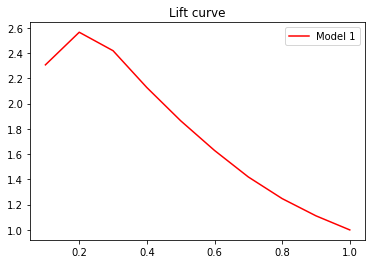

In [35]:
from matplotlib import pyplot as plt
x= [(x/10) for x in range (1,11)]
lift_curve = [metrics.liftN(df['target'], df['p_churn'], x/10) for x in range (1,11)]
plt.plot(x, lift_curve, linestyle='-', color='red', label='Model 1')
# axis labels
plt.title('Lift curve')
#plt.xlim(-0.01,1.01)
#plt.ylim(-0.01,1.03)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision-Recall curve

In [36]:
metrics.precision_recall_curve(df['target'], df['p_churn'])

(array([0.27778632, 0.27767528, 0.27771798, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99446597e-01, 9.99446597e-01, ...,
        1.10680686e-03, 5.53403431e-04, 0.00000000e+00]),
 array([0.00209515, 0.00209674, 0.00209705, ..., 1.        , 1.        ,
        1.        ]))

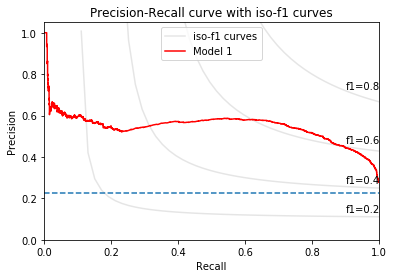

In [37]:
from matplotlib import pyplot as plt


f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
lines.append(l)
labels.append('iso-f1 curves')

lr_precision, lr_recall, _ = metrics.precision_recall_curve(df['target'], df['p_churn'])
# plot the precision-recall curves
no_skill = len(df['target'][df['target']==1]) / len(df['target'])
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
l,=plt.plot(lr_recall, lr_precision,linestyle='-', color='red', label='Model 1')
lines.append(l)
labels.append('Model 1')
# axis labels
plt.title('Precision-Recall curve with iso-f1 curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# show the legend
plt.legend(lines,labels)
# show the plot
plt.show()


# Basic Evaluators

## Lift Curve Evaluator

In [38]:
from mofr.basic_evaluators.LiftCurve import LiftCurveEvaluator

lce=LiftCurveEvaluator()
#help(lce)

In [39]:
lce.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score'])

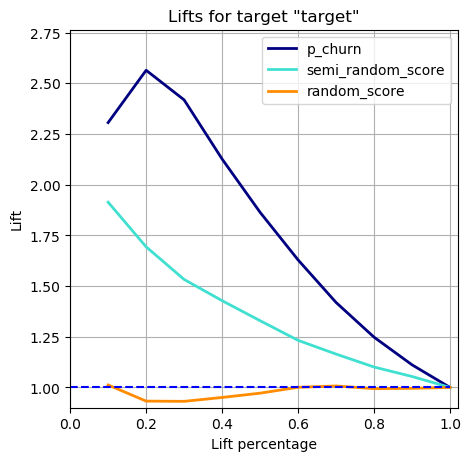

In [40]:
lce.get_graph()

## ROC Curve Evaluator

In [41]:
from mofr.basic_evaluators.ROCCurve import ROCCurveEvaluator

rce=ROCCurveEvaluator()
#help(rce)

In [42]:
rce.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score'])

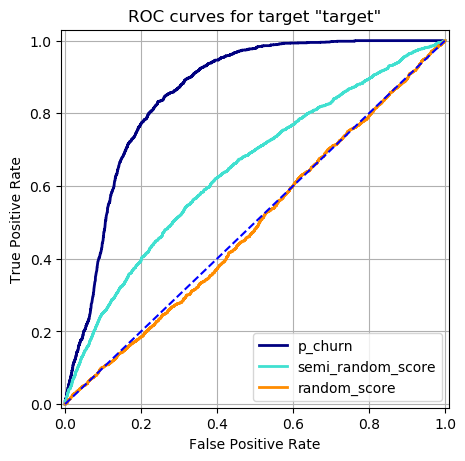

In [43]:
rce.get_graph()

## PR Curve Evaluator

In [44]:
from mofr.basic_evaluators.PRCurve import PRCurveEvaluator

prce=PRCurveEvaluator()
#help(prce)

In [45]:
prce.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score'])

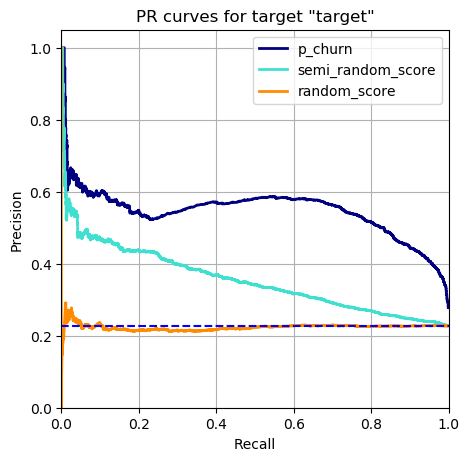

In [46]:
prce.get_graph()

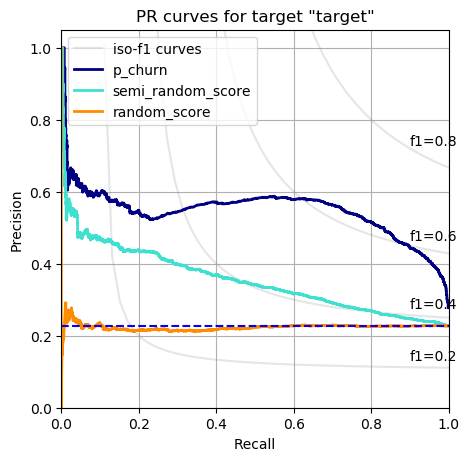

In [47]:
prce.get_graph(isocurves='on')

## Gini in Time Evaluator

In [48]:
from mofr.basic_evaluators.GiniInTime import GiniInTimeEvaluator

gite=GiniInTimeEvaluator()
#help(gite)

In [49]:
gite.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score']).tc('month')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be rem

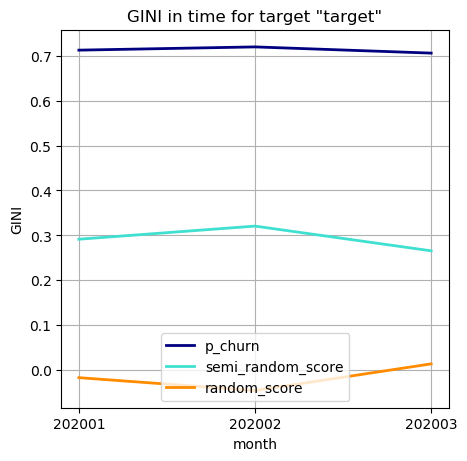

In [50]:
gite.get_graph()

In [51]:
gite.get_table()
gite.table

,p_churn,semi_random_score,random_score
month,,,
202001,0.712187,0.291562,-0.016378
202002,0.719386,0.320764,-0.045047
202003,0.705590,0.265747,0.014268
All,0.712179,0.292756,-0.015553


## Lift in Time Evaluator

In [52]:
from mofr.basic_evaluators.LiftInTime import LiftInTimeEvaluator

lite=LiftInTimeEvaluator()
#help(lite)

In [53]:
lite.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score']).tc('month')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


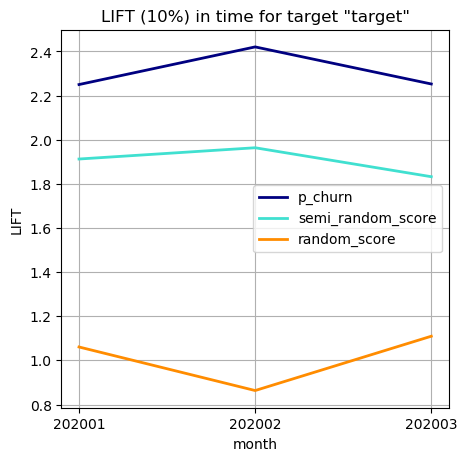

In [54]:
lite.get_graph()

In [55]:
lite.get_table()
lite.table

,p_churn,semi_random_score,random_score
month,,,
202001,2.249941,1.912450,1.060687
202002,2.420531,1.963507,0.863266
202003,2.252500,1.832257,1.109440
All,2.306531,1.913812,1.012219


## KS in Time Evaluator

In [56]:
from mofr.basic_evaluators.KSInTime import KSInTimeEvaluator

kite=KSInTimeEvaluator()
#help(kite)

In [57]:
kite.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score']).tc('month')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


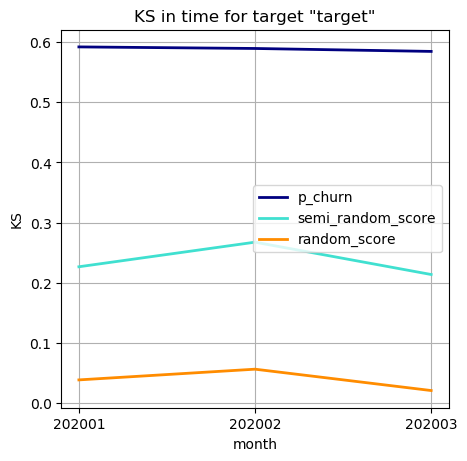

In [58]:
kite.get_graph()

In [59]:
kite.get_table()
kite.table

,p_churn,semi_random_score,random_score
month,,,
202001,0.592038,0.226641,0.038615
202002,0.589425,0.267519,0.056419
202003,0.584546,0.213764,0.020922
All,0.588207,0.225114,0.031807


## StabilityInTimeCategorical Evaluator

In [60]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [61]:
from mofr.basic_evaluators.StabilityInTimeCategorical import StabilityInTimeCategoricalEvaluator

sitcae=StabilityInTimeCategoricalEvaluator()
#help(sitcae)

In [62]:
sitcae.d(df).pc('categorical_predictor').tc('month')

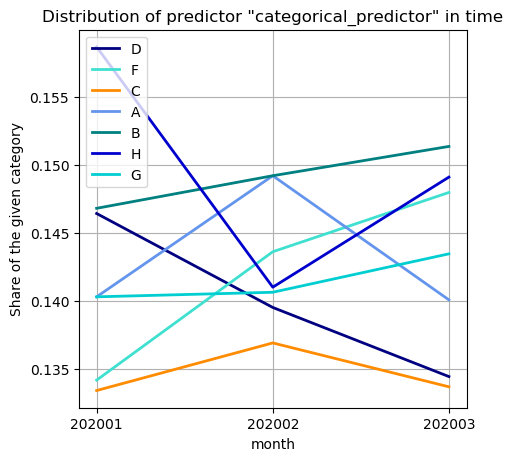

In [63]:
sitcae.get_graph()

In [64]:
sitcae.get_table()
sitcae.table

categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.140284,0.146800,0.133384,0.146416,0.134151,0.140284,0.158681
202002,0.149198,0.149198,0.136889,0.139500,0.143603,0.140619,0.140992
202003,0.140060,0.151355,0.133660,0.134413,0.147967,0.143449,0.149096


## StabilityInTimeContinuous Evaluator

In [65]:
from mofr.basic_evaluators.StabilityInTimeContinuous import StabilityInTimeContinuousEvaluator

sitcoe=StabilityInTimeContinuousEvaluator()
#help(sitcoe)

In [66]:
sitcoe.d(df).pc('p_churn').tc('month')

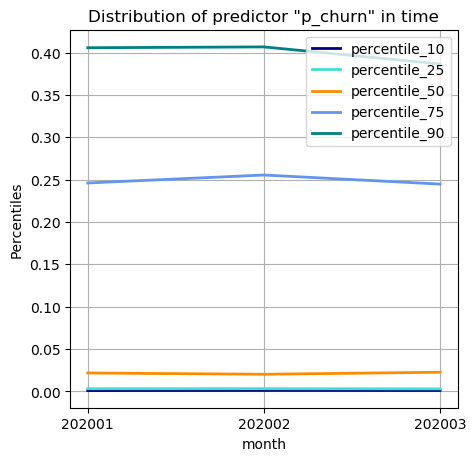

In [67]:
sitcoe.get_graph()

In [68]:
sitcoe.get_table()
sitcoe.table

,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90
month,,,,,
202001,0.001061,0.003215,0.021815,0.246052,0.405703
202002,0.001210,0.003276,0.020277,0.255474,0.406689
202003,0.001170,0.003025,0.022694,0.244772,0.386513


## HistogramCategorical Evaluator

In [69]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [70]:
from mofr.basic_evaluators.HistogramCategorical import HistogramCategoricalEvaluator

hcae=HistogramCategoricalEvaluator()
#help(hcae)

In [71]:
hcae.d(df).pc('categorical_predictor')

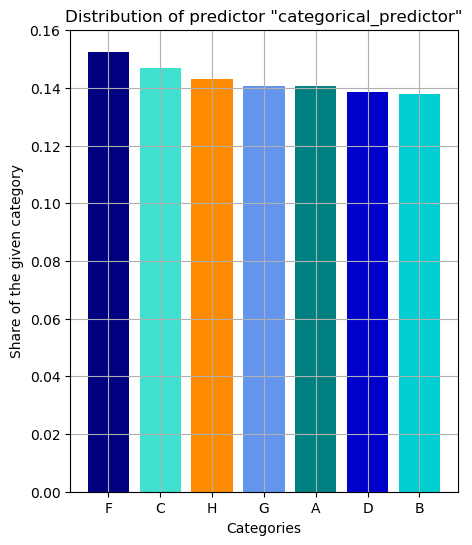

In [72]:
hcae.get_graph()

In [73]:
hcae.get_table()
hcae.table

,categorical_predictor %,categorical_predictor
F,0.152530,1212
C,0.146866,1167
H,0.142965,1136
G,0.140700,1118
A,0.140574,1117
D,0.138560,1101
B,0.137805,1095


## HistogramContinuous Evaluator

In [74]:
from mofr.basic_evaluators.HistogramContinuous import HistogramContinuousEvaluator

hcoe=HistogramContinuousEvaluator()
#help(hcoe)

In [75]:
hcoe.d(df).pc('p_churn')

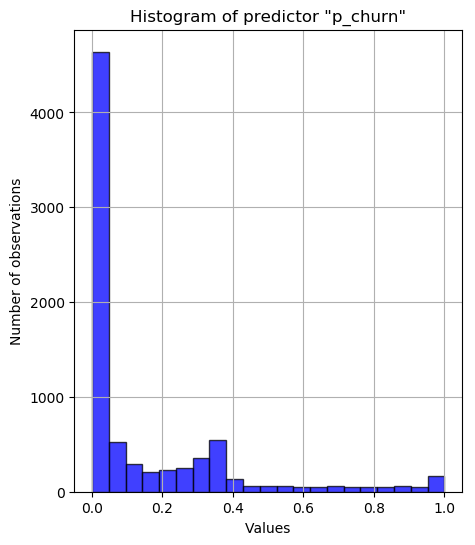

In [76]:
hcoe.get_graph()

In [77]:
hcoe.get_table()
hcoe.table

,p_churn
percentile_10,0.001139
percentile_25,0.003166
percentile_50,0.021627
percentile_75,0.247600
percentile_90,0.401849


## TargetAssociationCategorical Evaluator

In [78]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [79]:
from mofr.basic_evaluators.TargetAssociationCategorical import TargetAssociationCategoricalEvaluator

tacae=TargetAssociationCategoricalEvaluator()
#help(tacae)

In [80]:
tacae.d(df).t([('target', 'target_obs')]).pc('categorical_predictor').tc('month')

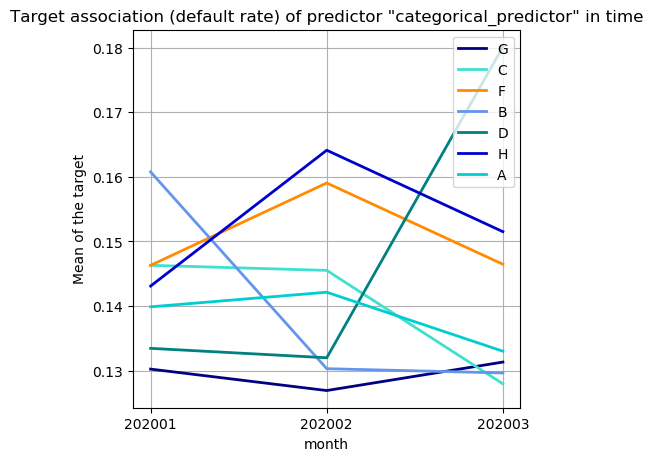

In [81]:
tacae.get_graph()

In [82]:
tacae.get_table()
tacae.table

categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.139871,0.160772,0.146302,0.133441,0.146302,0.130225,0.143087
202002,0.142132,0.130288,0.145516,0.131980,0.159052,0.126904,0.164129
202003,0.132997,0.129630,0.127946,0.180135,0.146465,0.131313,0.151515
All,0.138351,0.140564,0.140011,0.148312,0.150526,0.129496,0.152739


## TargetAssociationContinuous Evaluator

In [83]:
from mofr.basic_evaluators.TargetAssociationContinuous import TargetAssociationContinuousEvaluator

tacoe=TargetAssociationContinuousEvaluator()
#help(tacoe)

In [84]:
tacoe.d(df).t([('target', 'target_obs')]).pc('random_score').tc('month')

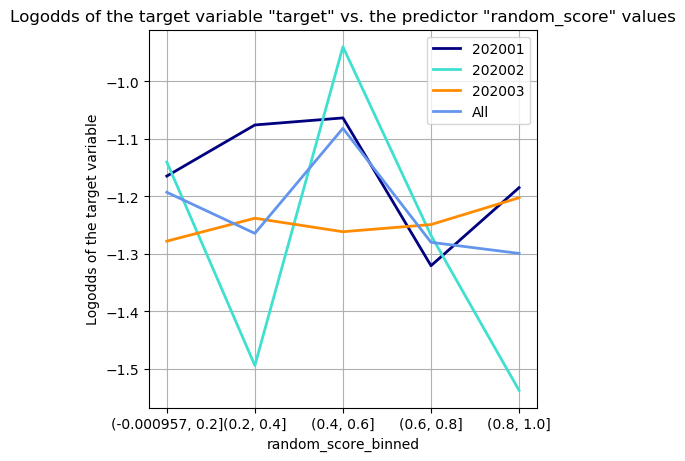

In [85]:
tacoe.get_graph()

In [106]:
tacoe.get_table()
tacoe.table

# Complex evaluators

## Categorical Predictor Evaluator

In [87]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [88]:
from mofr.complex_evaluators.CategoricalPredictor import CategoricalPredictorEvaluator

capre=CategoricalPredictorEvaluator()
#help(capre)

In [89]:
capre.d(df).t([('target', 'target_obs')]).pc('categorical_predictor').tc('month')

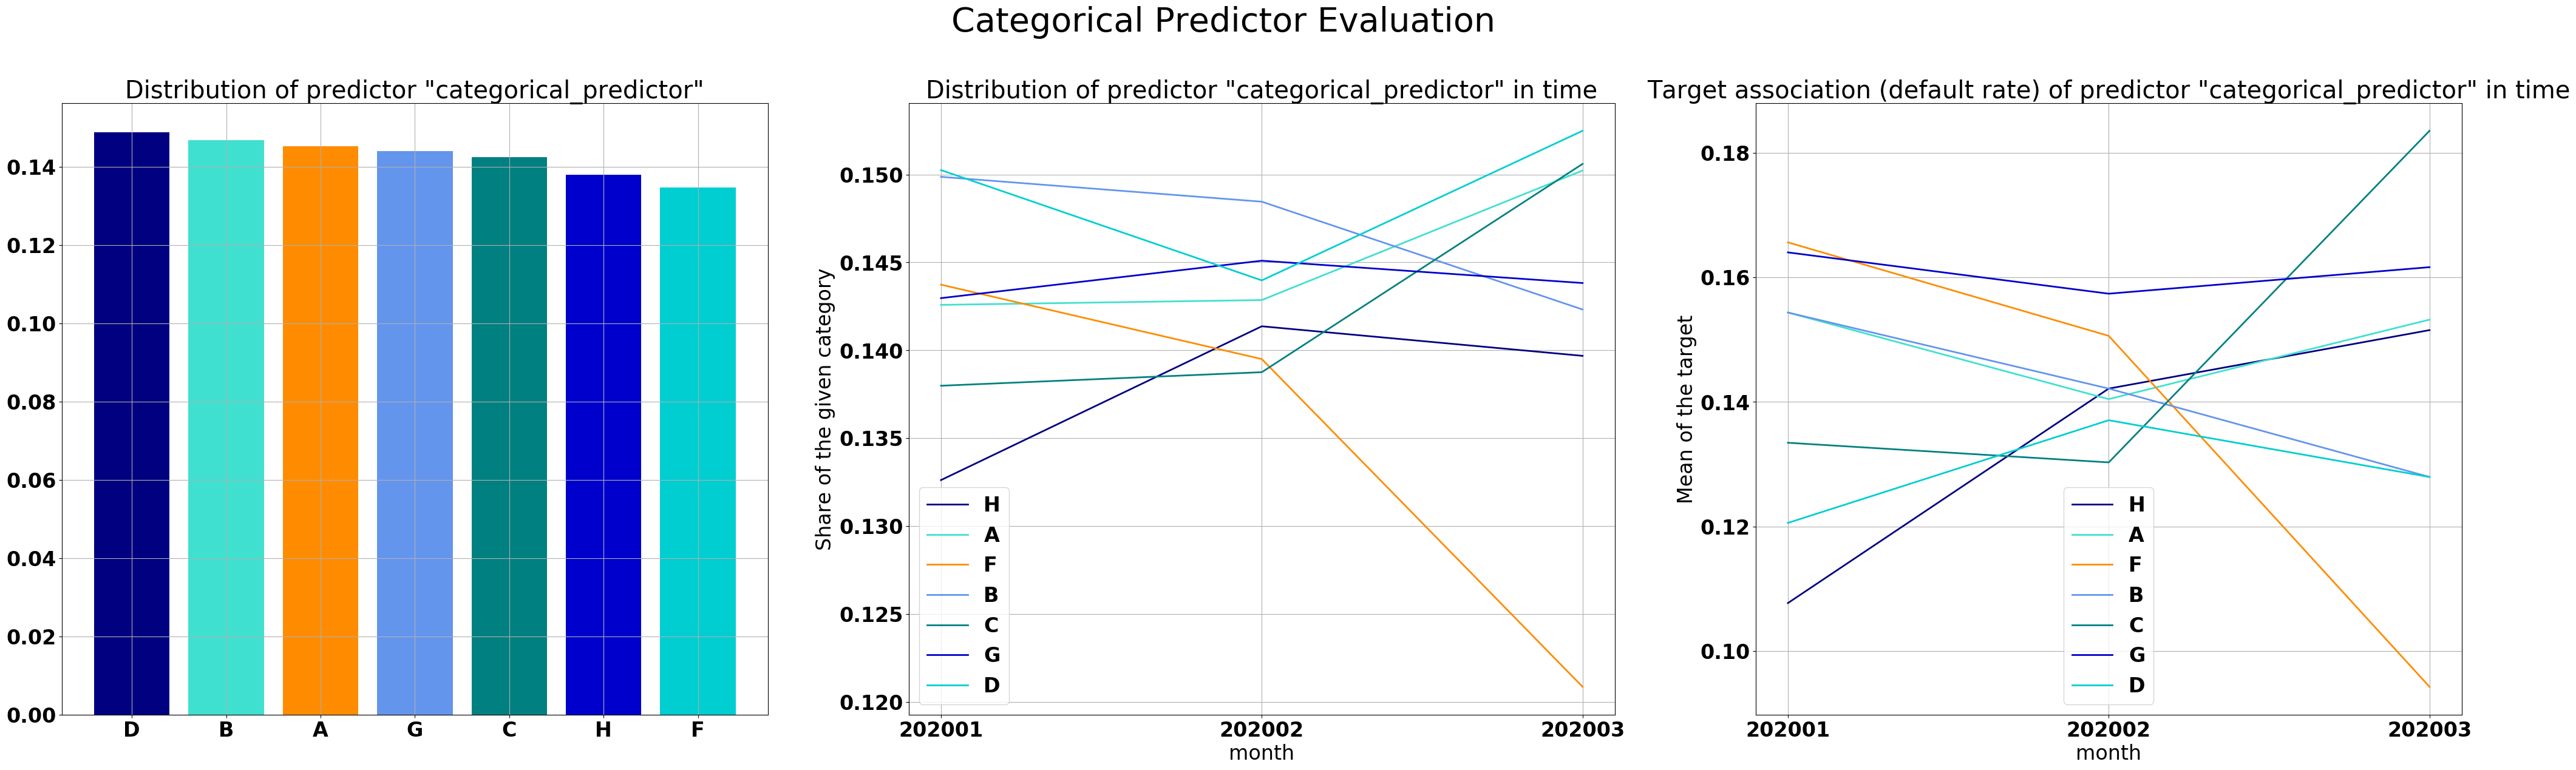

In [90]:
capre.get_graph()

In [91]:
capre.get_table()

,categorical_predictor %,categorical_predictor
D,0.148880,1183
B,0.146866,1167
A,0.145230,1154
G,0.143972,1144
C,0.142462,1132
H,0.137931,1096
F,0.134659,1070


categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.142583,0.149866,0.137984,0.150249,0.143733,0.142967,0.132618
202002,0.142857,0.148452,0.138754,0.143976,0.139500,0.145095,0.141365
202003,0.150226,0.142319,0.150602,0.152485,0.120858,0.143825,0.139684


categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.154341,0.154341,0.133441,0.120579,0.165595,0.163987,0.107717
202002,0.140440,0.142132,0.130288,0.137056,0.150592,0.157360,0.142132
202003,0.153199,0.127946,0.183502,0.127946,0.094276,0.161616,0.151515
All,0.149419,0.141671,0.148866,0.128390,0.137244,0.161040,0.133370


# Misc

In [92]:
pd.cut(df['target'], bins=5)

0       (-0.001, 0.2]
1          (0.8, 1.0]
2       (-0.001, 0.2]
3       (-0.001, 0.2]
4       (-0.001, 0.2]
            ...      
7941    (-0.001, 0.2]
7942    (-0.001, 0.2]
7943       (0.8, 1.0]
7944    (-0.001, 0.2]
7945    (-0.001, 0.2]
Name: target, Length: 7946, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [93]:
df['p_churn_binned']=pd.cut(df['p_churn'], bins=5)

In [94]:
pd.crosstab(index=df['p_churn_binned'], columns=df['month'], values=df['target'], rownames=None, colnames=None, aggfunc=['count','sum','mean',logodds_], margins=True, margins_name='All', dropna=True, normalize=False)

NameError: name 'logodds_' is not defined

In [95]:
def logodds_(x):
    mean_=np.mean(x)
    if mean_==1.0:
        return -10.0
    if mean_==0.0:
        return 10.0
    else:
        a=np.log(mean_/(1-mean_))
        return a
    

pd.crosstab(index=df['p_churn_binned'], columns=df['month'], values=df['target'], rownames=None, colnames=None, aggfunc=['count','sum','mean',logodds_], margins=True, margins_name='All', dropna=True, normalize=False)

count                        sum                      \
month            202001 202002 202003   All 202001 202002 202003   All   
p_churn_binned                                                           
(-0.000843, 0.2]   1881   1917   1912  5710    196    169    182   547   
(0.2, 0.4]          463    491    486  1440    283    278    282   843   
(0.4, 0.6]           71     89     76   236     31     40     33   104   
(0.6, 0.8]           84     77     71   232     43     37     36   116   
(0.8, 1.0]          110    107    111   328     69     67     61   197   
All                2609   2681   2656  7946    622    591    594  1807   

                      mean                                logodds_            \
month               202001    202002    202003       All    202001    202002   
p_churn_binned                                                                 
(-0.000843, 0.2]  0.104200  0.088159  0.095188  0.095797 -2.151406 -2.336329   
(0.2, 0.4]        0.611231  0.566191  0.580247  0.585417  0.452490  0.266329   
(0.4, 0.6]        0.436620  0.449438  0.434211  0.440678 -0.254892 -0.202941   
(0.6, 0.8]        0.511905  0.480519  0.507042  0.500000  0.047628 -0.077962   
(0.8, 1.0]        0.627273  0.626168  0.549550  0.600610  0.520534  0.515813   
All               0.238406  0.220440  0.223645  0.227410 -1.161441 -1.263103   

                                      
month               202003       All  
p_churn_binned                        
(-0.000843, 0.2] -2.251870 -2.244824  
(0.2, 0.4]        0.323787  0.345050  
(0.4, 0.6]       -0.264693 -0.238411  
(0.6, 0.8]        0.028171  0.000000  
(0.8, 1.0]        0.198851  0.408006  
All              -1.244552 -1.222994

In [96]:
a[a.columns[0]].index

NameError: name 'a' is not defined

In [97]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [98]:
pd.crosstab(index=df['categorical_predictor'], columns=df['month'], values=df['target'], rownames=None, colnames=None, aggfunc=sum, margins=True, margins_name='All', dropna=True, normalize='columns').transpose()

categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.160772,0.128617,0.117363,0.155949,0.147910,0.138264,0.151125
202002,0.135364,0.137056,0.137056,0.140440,0.138748,0.152284,0.159052
202003,0.124579,0.146465,0.138047,0.139731,0.132997,0.159933,0.158249
All,0.140564,0.137244,0.130603,0.145545,0.140011,0.149972,0.156060


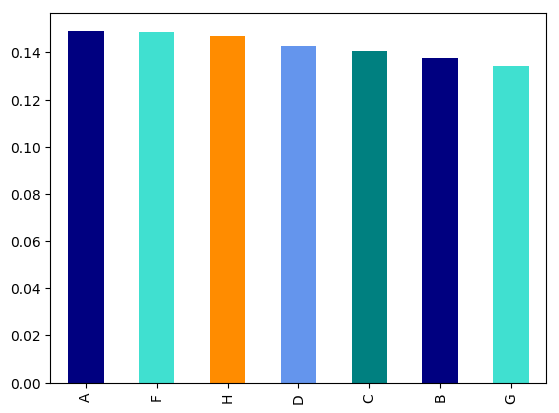

In [99]:
df['categorical_predictor'].value_counts(dropna=False, normalize=True).plot.bar(color=['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

In [100]:
a=df['categorical_predictor'].value_counts(dropna=False, normalize=True)
a

A    0.149257
F    0.148502
H    0.146992
D    0.142839
C    0.140448
B    0.137553
G    0.134407
Name: categorical_predictor, dtype: float64

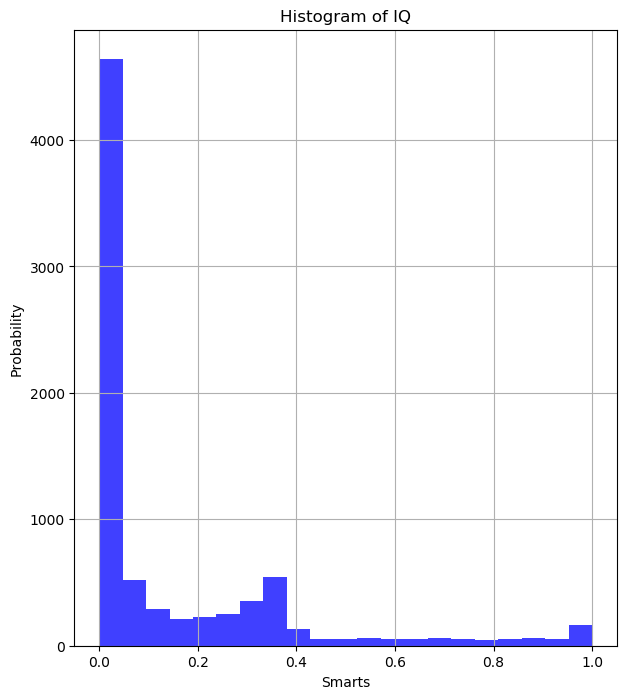

In [101]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 8))

# the histogram of the data
n, bins, patches = plt.hist(df['p_churn'], bins='doane', density=False, facecolor='b', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [102]:
a.values

array([0.14925749, 0.14850239, 0.1469922 , 0.14283916, 0.14044802,
       0.13755349, 0.13440725])

In [103]:
list(df[self.predictor_column].unique())

NameError: name 'self' is not defined

TypeError: can only concatenate str (not "int") to str

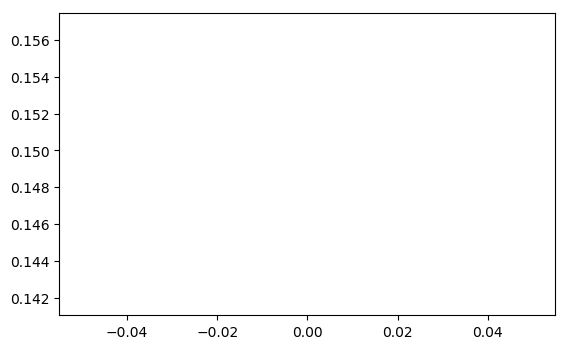

In [104]:
l, = plt.plot(a['A'])


#set plotting parameters
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.ticklabel_format(useOffset=False)
plt.xticks(range(min(a.index), max(a.index)+1))
#plt.xlim(min(_x)-0.1,max(_x)+0.1)
#plt.ylim(-0.01,1.03)
plt.xlabel('Month')
plt.ylabel('GINI')


plt.show()    

In [105]:
a['A']

0.14925748804429903